# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)

In [1]:
import sys

import matplotlib.pyplot as plt

# Add the parent directory to the path so that the custom utilities module is found
sys.path.insert(0, "..")

from utilities import load_data

g:\Backup\Documents\OpenCampus\Machine Learning With TensorFlow\Project\plain-language-classification\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset Overview

The dataset presented by [Toborek et al. (2023)](https://doi.org/10.48550/arXiv.2209.01106) consists of 708 articles in plain German and 712 articles in regular German.

In [2]:
# Load the data
data = load_data()

# Number of samples
count_samples = data.shape[0]

# Number of features
count_features = data.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {count_samples}")
print(f"Number of features: {count_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(data.head())

Number of samples: 59919
Number of features: 2
Example data:
                                                text  is_plain_language
0  Viele Menschen kennen die schmerzenden kleinen...                  0
1  Lippenherpes (Herpes labialis) – Symptom einer...                  0
2  Der Volksmund bezeichnet die im Bereich von Li...                  0
3  Dort zeigt sich die Virusinfektion am häufigst...                  0
4  Breiten sich die Herpesbläschen zum Beispiel b...                  0


## Handling Missing Values

There are no missing values.

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

text                 0
is_plain_language    0
dtype: int64

## Feature Distributions

Plain-language and regular-language sentences are fairly evenly distributed, with approximately 30,000 sentences per class.


Text(0, 0.5, 'Number of Sequences')

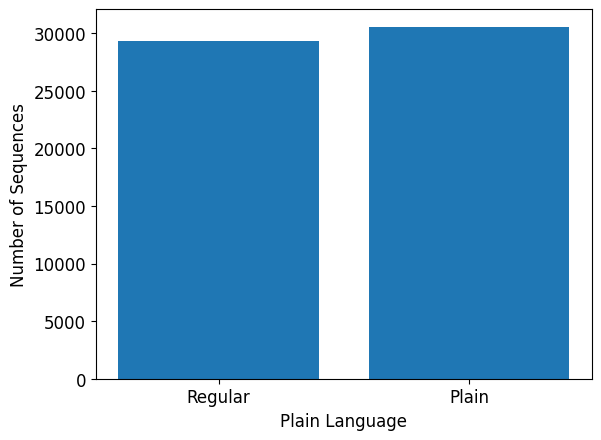

In [4]:
plt.rcParams["font.size"] = 12

title_plain_language = "Plain Language"
labels_plain_language = ["Regular", "Plain"]

value_counts = data["is_plain_language"].value_counts()

# Change index to be meaningful
value_counts = value_counts[[0, 1]]
value_counts.index = labels_plain_language

figure, axes = plt.subplots()

axes.bar(x=value_counts.index, height=value_counts)

axes.set_xticks(value_counts.index.tolist())
axes.set_xlabel(title_plain_language)
axes.set_ylabel("Number of Sequences")

Text(0, 0.5, 'Average Number of Words in a Sequence')

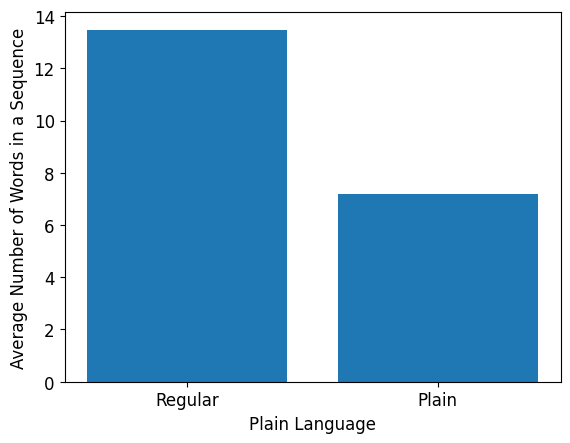

In [5]:
data["sentence_lengths"] = data["text"].str.split(" ").map(len)

average_sentence_lengths = data["sentence_lengths"].groupby(data["is_plain_language"]).mean()

average_sentence_lengths.index = labels_plain_language

figure, axes = plt.subplots()

axes.bar(x=average_sentence_lengths.index, height=average_sentence_lengths)

axes.set_xlabel(title_plain_language)
axes.set_ylabel("Average Number of Words in a Sequence")

Text(0, 0.5, 'Maximum Number of Words in a Sequence')

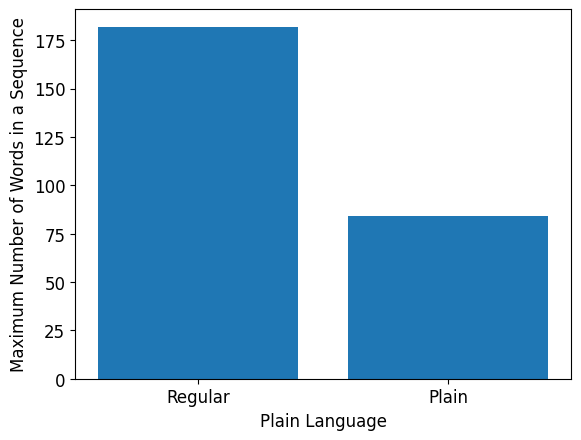

In [6]:
maximum_sentence_lengths = data["sentence_lengths"].groupby(data["is_plain_language"]).max()

maximum_sentence_lengths.index = labels_plain_language

figure, axes = plt.subplots()

axes.bar(x=maximum_sentence_lengths.index, height=maximum_sentence_lengths)

axes.set_xlabel(title_plain_language)
axes.set_ylabel("Maximum Number of Words in a Sequence")

## Possible Biases

Samples are balanced for the two classes, and the difference in sequence length is to be expected when comparing regular language to plain language. In their paper introducing the data corpus, Toborek et al. (2023) acknowledge that most of the data comes from only three websites ("Apotheken Umschau," "Mitteldeutscher Rundfunk," and "Stadt Köln"), which may lead to a data imbalance. The authors also note that, although the individual articles cover a variety of topics, there may also be a bias in which topics are translated into plain language and thus represented in the dataset.